In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\harsh\Desktop\New Microsoft Excel Worksheet.csv")
print(df)

      Restaurant Name           City  Rating                Cuisines  \
0      ABC Restaurant       New York     4.2          Italian, Pizza   
1          XYZ Bistro        Chicago     3.8         Indian, Chinese   
2      The Food Place  San Francisco     4.5         American, Pizza   
3        Sushi Corner    Los Angeles     4.8         Japanese, Sushi   
4        Bella Italia          Miami     4.1  Italian, Mediterranean   
5        Dragon House      Las Vegas     4.4          Chinese, Asian   
6     Tandoori Nights        Houston     4.3       Indian, Pakistani   
7    The Burger Joint         Dallas     4.0     American, Fast Food   
8         La Pizzeria        Chicago     4.7          Italian, Pizza   
9         Tokyo Grill  San Francisco     4.6         Japanese, Sushi   
10       Curry Garden        Atlanta     4.0      Indian, Vegetarian   
11       Spice Street       New York     3.9      Thai, Asian Fusion   
12  The Seafood Shack         Boston     4.2       Seafood, Amer

In [3]:
print(df.head)

<bound method NDFrame.head of       Restaurant Name           City  Rating                Cuisines  \
0      ABC Restaurant       New York     4.2          Italian, Pizza   
1          XYZ Bistro        Chicago     3.8         Indian, Chinese   
2      The Food Place  San Francisco     4.5         American, Pizza   
3        Sushi Corner    Los Angeles     4.8         Japanese, Sushi   
4        Bella Italia          Miami     4.1  Italian, Mediterranean   
5        Dragon House      Las Vegas     4.4          Chinese, Asian   
6     Tandoori Nights        Houston     4.3       Indian, Pakistani   
7    The Burger Joint         Dallas     4.0     American, Fast Food   
8         La Pizzeria        Chicago     4.7          Italian, Pizza   
9         Tokyo Grill  San Francisco     4.6         Japanese, Sushi   
10       Curry Garden        Atlanta     4.0      Indian, Vegetarian   
11       Spice Street       New York     3.9      Thai, Asian Fusion   
12  The Seafood Shack         Bost

In [4]:
print(df.info)

<bound method DataFrame.info of       Restaurant Name           City  Rating                Cuisines  \
0      ABC Restaurant       New York     4.2          Italian, Pizza   
1          XYZ Bistro        Chicago     3.8         Indian, Chinese   
2      The Food Place  San Francisco     4.5         American, Pizza   
3        Sushi Corner    Los Angeles     4.8         Japanese, Sushi   
4        Bella Italia          Miami     4.1  Italian, Mediterranean   
5        Dragon House      Las Vegas     4.4          Chinese, Asian   
6     Tandoori Nights        Houston     4.3       Indian, Pakistani   
7    The Burger Joint         Dallas     4.0     American, Fast Food   
8         La Pizzeria        Chicago     4.7          Italian, Pizza   
9         Tokyo Grill  San Francisco     4.6         Japanese, Sushi   
10       Curry Garden        Atlanta     4.0      Indian, Vegetarian   
11       Spice Street       New York     3.9      Thai, Asian Fusion   
12  The Seafood Shack         Bo

In [5]:
# Data Cleaning
df = df.dropna(subset=['City', 'Rating', 'Cuisines', 'Cost for two'])

In [6]:
print(df)

      Restaurant Name           City  Rating                Cuisines  \
0      ABC Restaurant       New York     4.2          Italian, Pizza   
1          XYZ Bistro        Chicago     3.8         Indian, Chinese   
2      The Food Place  San Francisco     4.5         American, Pizza   
3        Sushi Corner    Los Angeles     4.8         Japanese, Sushi   
4        Bella Italia          Miami     4.1  Italian, Mediterranean   
5        Dragon House      Las Vegas     4.4          Chinese, Asian   
6     Tandoori Nights        Houston     4.3       Indian, Pakistani   
7    The Burger Joint         Dallas     4.0     American, Fast Food   
8         La Pizzeria        Chicago     4.7          Italian, Pizza   
9         Tokyo Grill  San Francisco     4.6         Japanese, Sushi   
10       Curry Garden        Atlanta     4.0      Indian, Vegetarian   
11       Spice Street       New York     3.9      Thai, Asian Fusion   
12  The Seafood Shack         Boston     4.2       Seafood, Amer

In [7]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

In [8]:
# exploring the unique cities and cuises
print(df['City'].unique())
print(df['Cuisines'].unique())

['New York' 'Chicago' 'San Francisco' 'Los Angeles' 'Miami' 'Las Vegas'
 'Houston' 'Dallas' 'Atlanta' 'Boston' 'San Diego' 'Seattle']
['Italian, Pizza' 'Indian, Chinese' 'American, Pizza' 'Japanese, Sushi'
 'Italian, Mediterranean' 'Chinese, Asian' 'Indian, Pakistani'
 'American, Fast Food' 'Indian, Vegetarian' 'Thai, Asian Fusion'
 'Seafood, American' 'Vegan, American' 'Steak, American'
 'Mexican, Fast Food' 'Italian, Pasta' 'BBQ, American' 'French, European']


In [9]:
df = df.drop_duplicates()

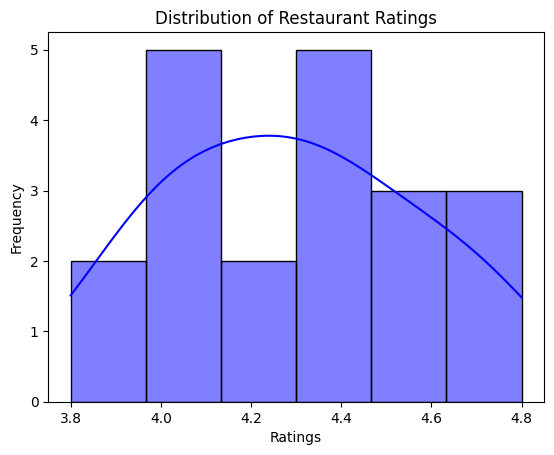

In [10]:
# Exploratory data analysis(EDA)
plt.Figure(figsize=(10,6))
sns.histplot(df['Rating'], kde=True , color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

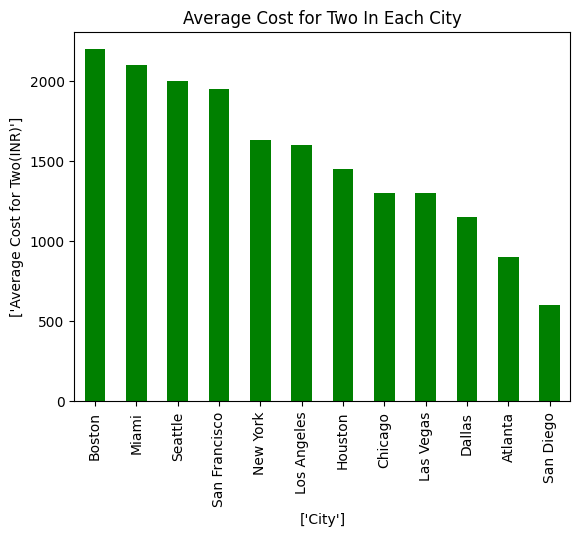

In [11]:
# Average cost for two city
avg_cost_by_city = df.groupby('City')['Cost for two'].mean().sort_values(ascending=False)
plt.Figure(figsize=(12,6))
avg_cost_by_city.head(20).plot(kind='bar', color='green')
plt.title('Average Cost for Two In Each City')
plt.xlabel(['City'])
plt.ylabel(['Average Cost for Two(INR)'])
plt.xticks(rotation=90)
plt.show()

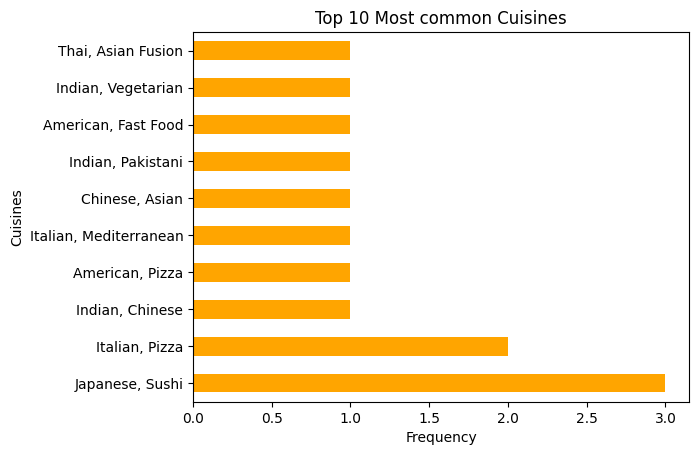

In [12]:
#   Most Common cuisness in the dataset
cuisine_counts = df['Cuisines'].value_counts().head(10)
plt.Figure(figsize=(10,6))
cuisine_counts.plot(kind='barh', color='orange')
plt.title("Top 10 Most common Cuisines")
plt.xlabel('Frequency')
plt.ylabel('Cuisines')
plt.show()

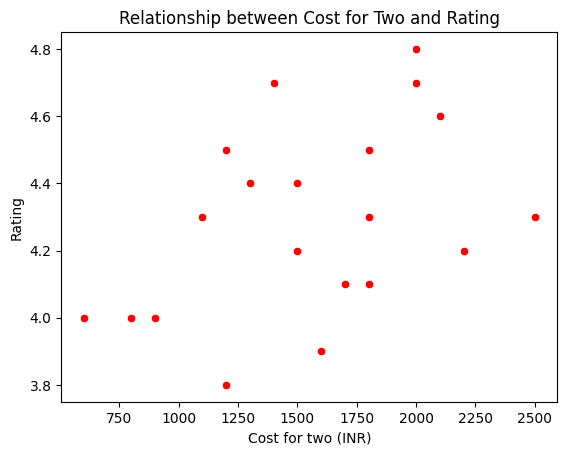

In [13]:
# Relationship between Cost of two  and Rating
plt.Figure(figsize=(10,6))
sns.scatterplot(x='Cost for two', y='Rating', data=df, color='red')
plt.title('Relationship between Cost for Two and Rating')
plt.xlabel('Cost for two (INR)')
plt.ylabel('Rating')
plt.show()

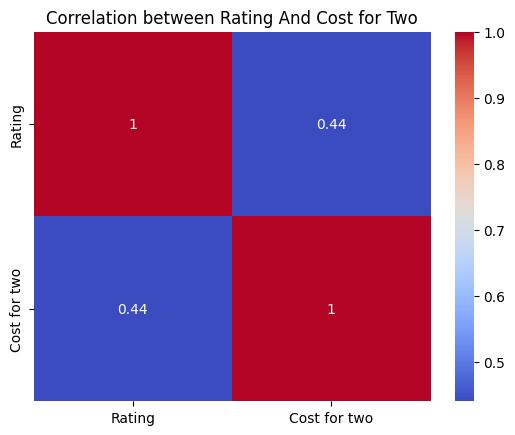

In [14]:
# Heatmap of correlation between  numeric
corr_matrix = df[['Rating','Cost for two']].corr()
plt.Figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation between Rating And Cost for Two')
plt.show()

In [16]:
# FINDING THE BEST RESTARANT IN THE CITY
best_resturants_by_city = df.groupby('City')['Rating'].mean().sort_values(ascending=False)
print("Best Resturants by city based on Average Rating:")
print(best_resturants_by_city.head())

Best Resturants by city based on Average Rating:
City
Seattle          4.70
Los Angeles      4.65
San Francisco    4.55
Las Vegas        4.40
Chicago          4.25
Name: Rating, dtype: float64


In [17]:
#  Find the City with the most expensive average cost for two
most_expensive_city = avg_cost_by_city.idxmax()
print(f"The City with the highest average cost for two is: {most_expensive_city}")

The City with the highest average cost for two is: Boston


In [18]:
#Interactive plt using Plotly:Top cities with highest average rating
fig=px.bar(best_resturants_by_city.head(10), x = best_resturants_by_city.head(10).index,
           y = best_resturants_by_city.head(10).values,title='Top Cities with the Best Resturants (Based on Ratings)', 
           labels={'x': 'City','y':'Average Rating'})
fig.show()